# Predicting Anxiety and Depression Based on Social Media Use Patterns

The relationship between social media use and mental health outcomes is not fully understood.
Given that social media is widespread among many different demographics, it is critical to understand this relationship and the effects social media has on mental health in order to properly treat mental disorders and improve quality of life for those suffering from them.

As "mental health" is a far reaching and abstractly defined concept, this project will focus on two of the most common mental health disorders, anxiety and depression, and will use various machine learning classifiers to isolate the relationship between these disorders and social media use in individuals and create models capable of predicting depression and anxiety.

### The impact of mental illness

Mental illness impacts individuals, and by extension society, in a variety of ways.

According to the World Health Organization (WHO):
- Mental health conditions can cause difficulties in all aspects of life, including relationships with family, friends and community.
- In 2019, 970 million people globally were living with a mental disorder, with anxiety and depression the most common. This means approximately **1 in 8** people suffer from some form of mental illness.
- In 2019, 301 million people were living with an anxiety disorder including 58 million children and adolescents.
- In 2019, 280 million people were living with depression, including 23 million children and adolescents.

The high prevalence of both social media use and mental health disorders combined with the currently limited understanding of the way they interact makes further analysis of the subject crucial to public health.

# Project goals

Despite the prevalence of these disorders, detection and diagnosis still pose a significant challenge due to several factors:
- Diagnosis of anxiety and depression is made according to the self reported feelings of the patient.

  This means that factors such as the individuals personal feelings on mental health, their willingness to accept help, and social stigma all play a part in the detection of these disorders in a way which is not present with physical conditions.
-  Disease comorbidity

   The existence of two or more mental health disorders in an individual is common, and those with one type of mental disorder often develop other types of mental disorders.
   Moreover, many disorders share similar symptoms, making it difficult to identify the primary condition.

The primary goal of this project is to create a predictive model for detection of anxiety and depression based on individual social media use patterns.
Through this, I hope to create another tool for individuals and health care professionals to use in the difficult task of mental health diagnosis.

The secondary goal of this project is to map the relationship between mental health and social media, and to identify healthy and unhealthy social media use patterns using machine learning tools. 

# Exploratory Data Analysis
### The Dataset

The dataset used in this project is comprised of 482 responses to a survey conducted on Bangladeshi citizens.
The first 8 questions are designed to understand the demographics and social media use patterns of the participants. 
The last 12 questions are designed to get various mental health indicators regarding the participants, and responses are based on the Likert scale (meaning a low score of 1 indicates that the participant "strongly disagrees" with the question, and a high score of 5 means the participant "strongly agrees").

The set: https://docs.google.com/spreadsheets/d/1lWFIL7h0F7xtmJHNPJX7ttPkO4v9j3xQ2E9Qb1wjek4/edit?usp=sharing

### Importing and loading the data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# create a random state variable to ensure reproducability of data manipulation later on
randState = 37

In [8]:
data = pd.read_csv('formresponses.csv')

### Data Preprocessing

We have ample information regarding our parameters, and so we will begin by performing manual dimensionality reduction to remove irrelevant data.<br>
Let us examine our variables:

In [11]:
list(data.columns)

['Timestamp',
 '1. What is your age?',
 '2. Gender',
 '3. Relationship Status',
 '4. Occupation Status',
 '5. What type of organizations are you affiliated with?',
 '6. Do you use social media?',
 '7. What social media platforms do you commonly use?',
 '8. What is the average time you spend on social media every day?',
 '9. How often do you find yourself using Social media without a specific purpose?',
 '10. How often do you get distracted by Social media when you are busy doing something?',
 "11. Do you feel restless if you haven't used Social media in a while?",
 '12. On a scale of 1 to 5, how easily distracted are you?',
 '13. On a scale of 1 to 5, how much are you bothered by worries?',
 '14. Do you find it difficult to concentrate on things?',
 '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
 '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
 '17. How often do

Since the main focus of this project is an analysis related to depression and anxiety, we will remove all mental health indicators that are unrelated to these two conditions. The symptoms we require indicators for, and the questions that are relevant to them, are as follows:

<u>Depression:</u>
- a depressed mood (question 18)
- a loss of pleasure or interest in activities (question 19)
- poor concentration (questions 10, 12, 14)
- feelings of excessive guilt or low self-worth (question 15)
- hopelessness about the future (no relevant questions)
- thoughts about dying or suicide (no relevant questions)
- disrupted sleep (question 20)
- changes in appetite or weight (no relevant questions)
- feeling very tired or low in energy. (question 18)

<u>Anxiety:</u>
- excessive fear or worry about a specific situation or a broad range of everyday situations (question 13)
- poor concentration (questions 10, 12, 14)
- feeling irritable, tense or restless (question 11)
- experiencing nausea or abdominal distress (no relevant questions)
- having heart palpitations (no relevant questions)
- sweating, trembling or shaking (no relevant questions)
- disrupted sleep (question 20)
- having a sense of impending danger, panic or doom (question 13)

(symptoms for both disorders are according to the WHO: https://www.who.int/news-room/fact-sheets/detail/depression, https://www.who.int/news-room/fact-sheets/detail/anxiety-disorders)

We can see that all the questions that are mental health indicators are relevant to our analysis except questions 9, 16 and 17.<br>
In addition, the first column indicates a timestamp for when the participant took the survery, which we dont need, and the 7th column asks whether the participant is a social media user, which is already quantified in a satisfactory way by the 'hours spent on social media' column.<br>
So, we will remove these columns from our dataframe.

In [13]:
data = data.drop(columns=['Timestamp', '6. Do you use social media?', '9. How often do you find yourself using Social media without a specific purpose?', 
                          '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
                          '17. How often do you look to seek validation from features of social media?'] , axis=1)

we will also rename the columns for the sake of simplicity:

In [15]:
data.rename(columns = {'1. What is your age?':'Age','2. Gender':'Sex','3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Time Spent',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'Distracted by SM',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Restlessness',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'Easily Distracted',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxious',
                       '14. Do you find it difficult to concentrate on things?':'Difficulty Concentrating',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'SM Comparison',
                       '18. How often do you feel depressed or down?':'Depressed',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Loss of Interest in Activities',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Sleep Issues' },inplace=True)

and to further simplify and focus our analysis, we will remove all participants which do not identify as "male" or "female":

In [17]:
# show all gender counts
vCounts = data['Sex'].value_counts()
print(vCounts)

Sex
Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: count, dtype: int64


In [18]:
# remove all sexes which are not 'male' or 'female'
data.drop(data.loc[data['Sex'] =='There are others???'].index, inplace=True)
data.drop(data.loc[data['Sex'] =='Non binary '].index, inplace=True)
data.drop(data.loc[data['Sex'] =='Trans'].index, inplace=True)
data.drop(data.loc[data['Sex'] =='unsure '].index, inplace=True)
data.drop(data.loc[data['Sex'] =='NB'].index, inplace=True)
data.drop(data.loc[data['Sex'] =='Non-binary'].index, inplace=True)
data.drop(data.loc[data['Sex'] =='Nonbinary '].index, inplace=True)

# TODO DELETE THIS
print(data.columns.values)

['Age' 'Sex' 'Relationship Status' 'Occupation' 'Affiliations'
 'Platforms Used' 'Time Spent' 'Distracted by SM' 'Restlessness'
 'Easily Distracted' 'Anxious' 'Difficulty Concentrating' 'SM Comparison'
 'Depressed' 'Loss of Interest in Activities' 'Sleep Issues']


### Depression and Anxiety scores
In order to train machine learning models on our data, we must first quantify the likelihood of depression and anxiety in our participants.<br> Since the answers for each indicator are on a scale of 1 to 5, we will do this by simply summing up the answers related to each condition, and adding them as columns "Anxiety score" and "Depression score". <br>We will also double the weight of questions 13 and 18, since they are the primary symptoms of each condition and are therefor the most direct indicators of anxiety/depression. 

In [20]:
# create arrays for each condition with the appropriate indicators according to the WHO as specified above

depression = ['Depressed', 'Loss of Interest in Activities', 'Distracted by SM','Easily Distracted', 'Difficulty Concentrating', 'SM Comparison', 'Sleep Issues']
anxiety = ['Anxious', 'Restlessness', 'Distracted by SM','Easily Distracted', 'Difficulty Concentrating', 'Sleep Issues']

# sum up scores for depression and anxiety
data['Depression Score'] = data[depression].sum(axis=1)
data['Anxiety Score'] = data[anxiety].sum(axis=1)

# double the weight of questions 13 and 18 by adding them to the score columns again.
data['Depression Score'] += data['Depressed']
data['Anxiety Score'] += data['Anxious']

There are 7 depression indicators and 6 anxiety indicators, so the score range for depression is [8, 40] and the score range for anxiety is [7, 35].<br>
We will split each of these ranges into 4 subranges indicating the likelihood of depression/anxiety in each participant, and add them as columns:<br>

In [22]:
# define a function which takes a row, and returns the likelihood of depression based on the depression score for that row.
def depRange(row):
    if row['Depression Score'] < 16:
        return 'low'
    if row['Depression Score'] < 24:
        return'moderate'
    if row['Depression Score'] < 32:
        return 'high'
    return'very high'

# define a function which takes a row, and returns the likelihood of anxiety based on the anxiety score for that row.
def anxRange(row):
    if row['Anxiety Score'] < 16:
        return 'low'
    if row['Anxiety Score'] < 24:
        return'moderate'
    if row['Anxiety Score'] < 32:
        return 'high'
    return'very high'

# apply the functions to our dataframe, and create new columns indicating depression and anxiety likelihood.
data['Depression Likelihood'] = data.apply(depRange, axis=1)
data['Anxiety Likelihood'] = data.apply(anxRange, axis=1)

The levels of our participants' depression and anxiety are now quantified, and we can start visualizing the data.

### Data Visualization
Lets begin by looking at the general distribution of the likelihood of depression and anxiety in our dataset:

<Axes: xlabel='Depression Likelihood', ylabel='Count'>

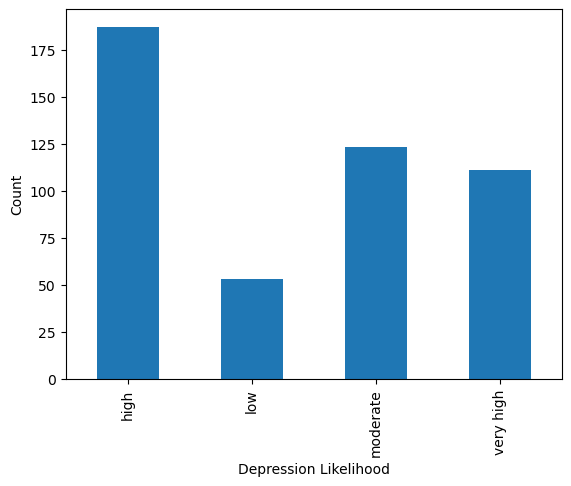

In [24]:
data.groupby('Depression Likelihood').size().plot.bar(xlabel='Depression Likelihood', ylabel='Count')

<Axes: xlabel='Anxiety Likelihood', ylabel='Count'>

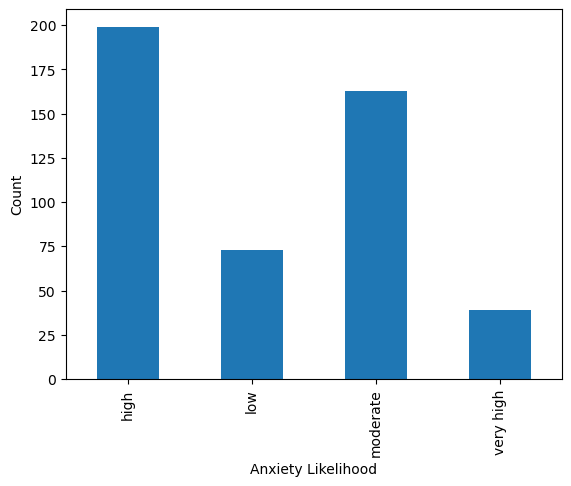

In [25]:
data.groupby('Anxiety Likelihood').size().plot.bar(xlabel='Anxiety Likelihood', ylabel='Count')

From these two plots we can see that anxiety and depression are present in our sample to a relatively high degree, with the majority of participants presenting with a high or moderate likelihood of depression and anxiety.<br>
We can also see that there is a slightly higher prevelance of anxiety disorders among the participants which is consistent with real world data, although a much higher percentage of the sample suffers from a very high likelihood of depression, in comparison with much lower levels (approx. a third) of very high anxiety.<br>

The distribution of depression and anxiety likelihoods across our dataset is very unbalanced, which we will take care of after we conclude our EDA and data cleanup.

Now let's examine the distributions of depression and anxiety across our parameters. We will start with the hours spent on social media:

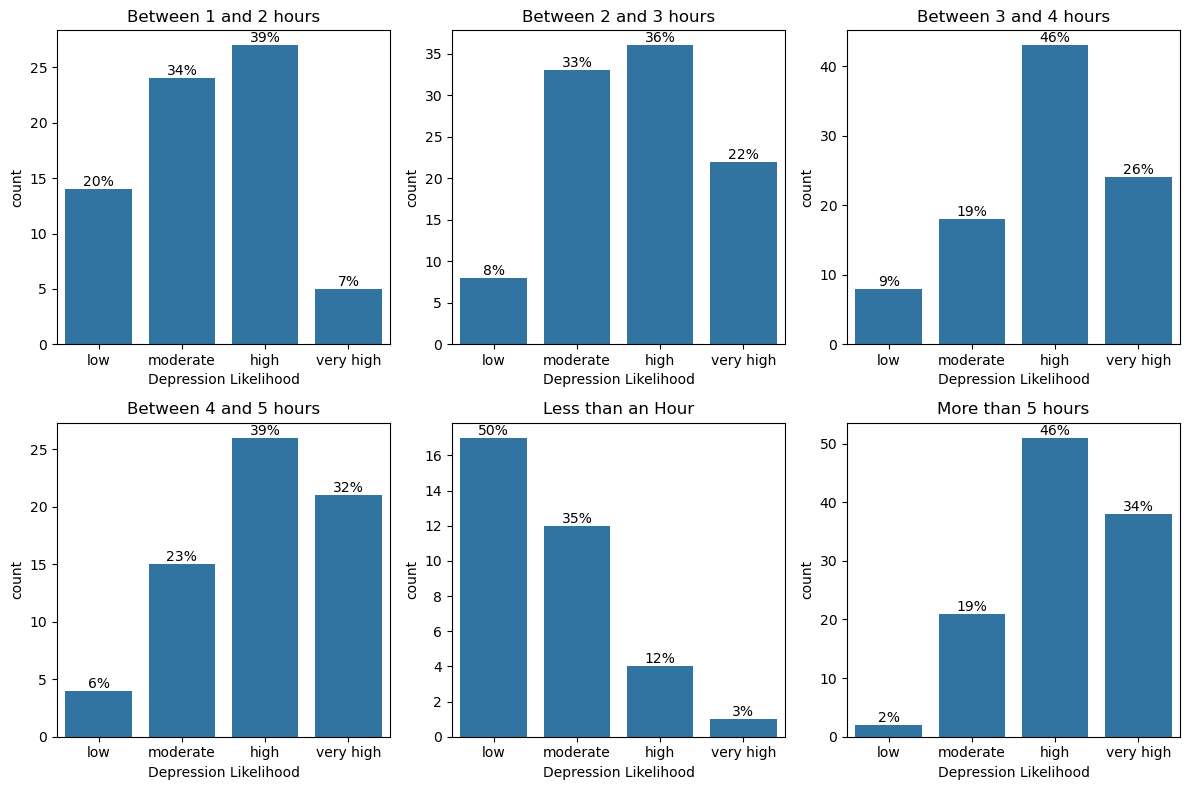

In [27]:
# get the value counts for each 'time spent' category
vCounts = data['Time Spent'].value_counts().sort_index()

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
row = 0
col = 0

# create plots
for i, time in enumerate(vCounts.keys()):
    vCount = vCounts.iloc[i]
    
    df = data.loc[data['Time Spent'] == time]
    sns.countplot(data=df, x='Depression Likelihood', ax=axs[row,col], order= ['low', 'moderate', 'high', 'very high'])

    ax = axs[row, col]
    ax.set_title(time)

    # calculate percentage levels for each bar and add it as text.
    for p in ax.patches: 
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2, 
                height,
                '{0:.0%}'.format(height/vCount),
                va="bottom", ha="center")
    col += 1
    if col >= 3:
        col = 0
        row += 1

plt.tight_layout()

In general, the data seems to suggest that the higher the amount of time spent on social media, the higher the likelihood and severity of depression indicators.<br>
Those who spend less than an hour on social media have by far the lowest percentage of 'very high' depression likelihood and the highest percentage of 'low' depression likelihood, and the reverse is true for those who spend more than 5 hours on social media. <br>
Lets examine the likelihood of anxiety:

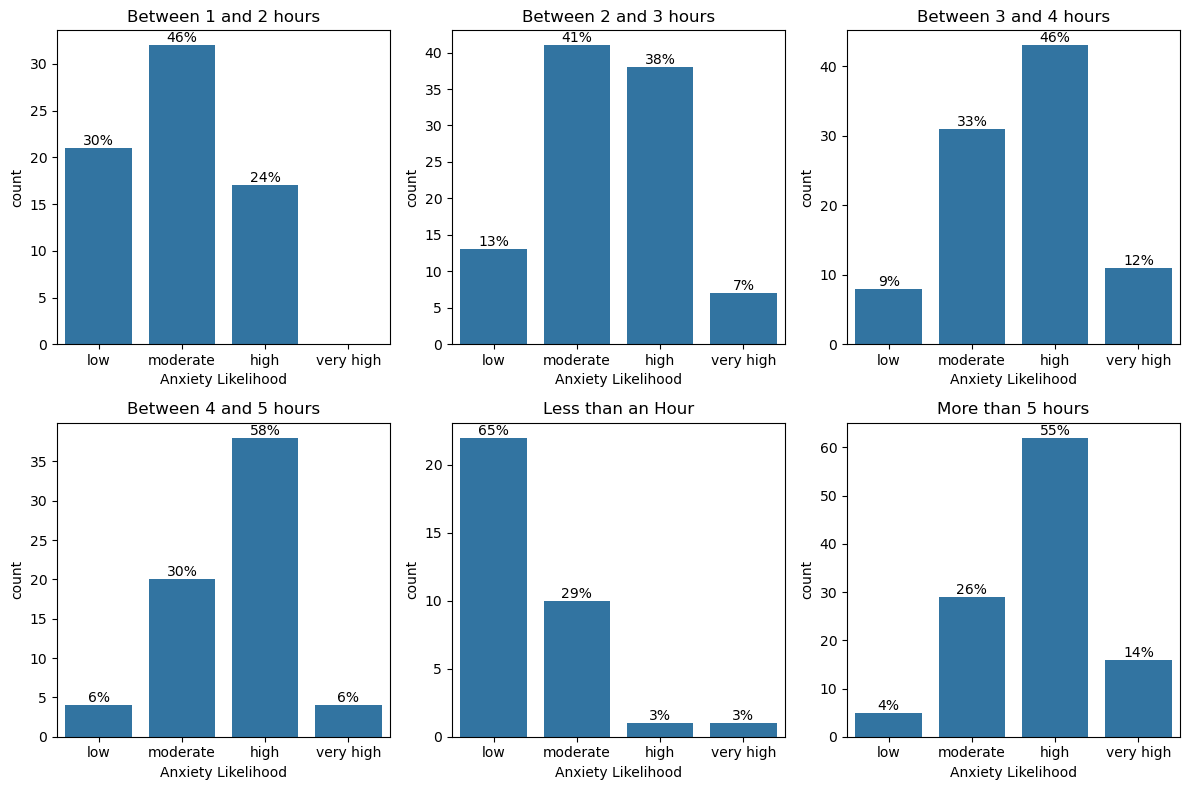

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
row = 0
col = 0

# create plots
for i, time in enumerate(vCounts.keys()):
    vCount = vCounts.iloc[i]
    
    df = data.loc[data['Time Spent'] == time]
    sns.countplot(data=df, x='Anxiety Likelihood', ax=axs[row,col], order= ['low', 'moderate', 'high', 'very high'])

    ax = axs[row, col]
    ax.set_title(time)

    # calculate percentage levels for each bar and add it as text.
    for p in ax.patches: 
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2, 
                height ,
                '{0:.0%}'.format(height/vCount),
                va="bottom", ha="center")
    col += 1
    if col >= 3:
        col = 0
        row += 1

plt.tight_layout()

Anxiety likelihood trends appear to match those for depression likelihood, in that the lower the time spent on social media, the lower the presence and severity of anxiety indicators and overwhelmingly the lowest prevalence of anxiety indicators is among those who spend less than an hour on social media and the highest prevalence is among those who spend more than 5 hours on it. <br>

Now we will examine the distribution of our participants' depression and anxiety likelihood by platform:

In [31]:
# create color dictionary and platform enum for convinience later
from enum import IntEnum

indicatorColors = {'very high': 'C0',
                   'high': 'C1',
                   'moderate': 'C2',
                   'low': 'C3'}

class Platforms(IntEnum):
    FB = 0
    INST = 1
    TKTK = 2
    DSCR = 3
    TWIT = 4
    SNAP = 5
    REDT = 6
    PINT = 7
    YT = 8

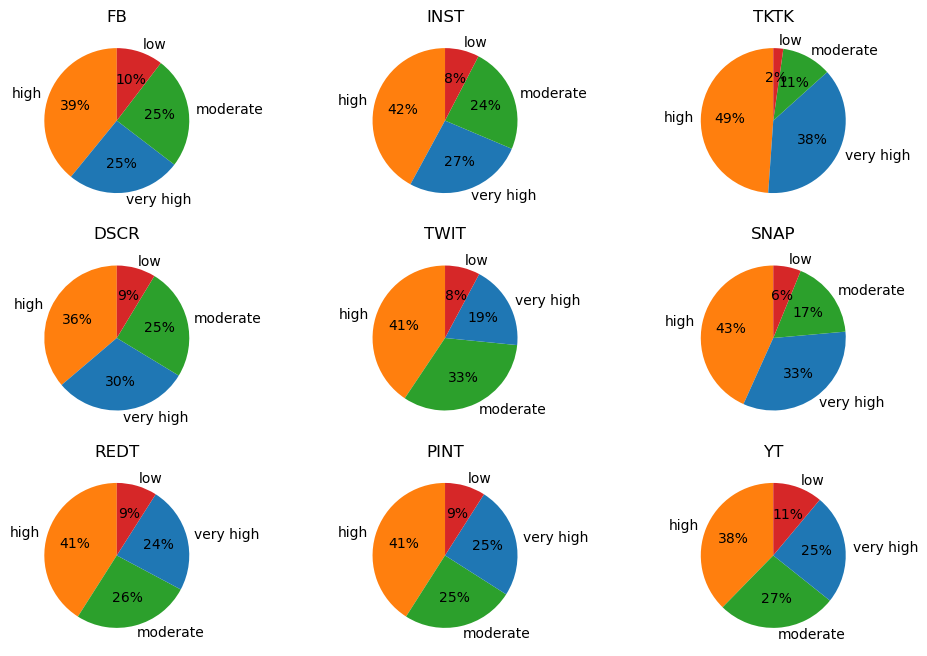

In [32]:
# get dataframes for every platform (there are multiple options for platforms and we need to isolate them)
dataFrames = [data.loc[data['Platforms Used'].str.contains("Facebook")], 
              data.loc[data['Platforms Used'].str.contains("Instagram")], 
              data.loc[data['Platforms Used'].str.contains("TikTok")],
              data.loc[data['Platforms Used'].str.contains("Discord")],
              data.loc[data['Platforms Used'].str.contains("Twitter")],
              data.loc[data['Platforms Used'].str.contains("Snapchat")],
              data.loc[data['Platforms Used'].str.contains("Reddit")],
              data.loc[data['Platforms Used'].str.contains("Pinterest")],
              data.loc[data['Platforms Used'].str.contains("YouTube")]]

# get the depression and anxiety likelihood value counts for each platform
depValueCounts = []
anxValueCounts = []
for df in dataFrames:
    depValueCounts.append(df['Depression Likelihood'].value_counts())
    anxValueCounts.append(df['Anxiety Likelihood'].value_counts())

# create depression likelihood pie charts
fig, axs = plt.subplots(3, 3, figsize=(12, 8))
i = 0
for row in range(3):
    for col in range(3):
        vals = depValueCounts[i].values
        labels = depValueCounts[i].index
        
        axs[row, col].pie(vals, labels=labels, autopct = lambda p:'{:.0f}%'.format(p), startangle=90, colors=[indicatorColors[key] for key in labels])
        axs[row,col].set_title(Platforms(i).name)
        i += 1


Interestingly, it appears that for most of the platforms the categories of different depression likelihoods are very similarly distributed.<br>
The outlier appears to be Tiktok, which has by far the highest percentage of those who have a high or very high likelihood of depression. Even still, the exception is minor.<br>

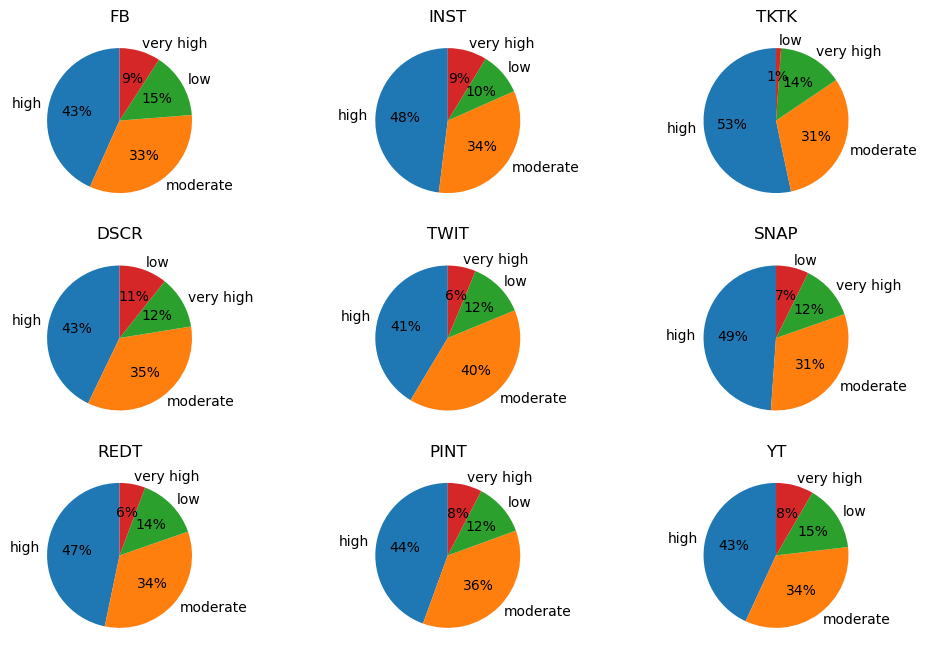

In [34]:
# create anxiety likelihood pie charts
fig, axs = plt.subplots(3, 3, figsize=(12, 8))
i = 0
for row in range(3):
    for col in range(3):
        vals = anxValueCounts[i].values
        labels = anxValueCounts[i].index
        
        axs[row, col].pie(vals, labels=labels, autopct = lambda p:'{:.0f}%'.format(p), startangle=90)
        axs[row,col].set_title(Platforms(i).name)
        i += 1

following the trend of the depression likelihood charts, anxiety likelihood is also distributed relatively similarly across different social media platforms.<br>

MODELS TODO: build the following models: logistic regression, decision trees, random forest, KNN, and support vector machine, using the feature selections from the EDA, and perform analysis of their successes/failures individually and in comparison with each other.

EDA TODO: anxiety and depression likelihood distribution by age, relationship status and occupation + overall analysis of trends in EDA + correlation heatmap utilizing boruta/mRMR for feature selection 

Lets examine our gender distribution:

([<matplotlib.patches.Wedge at 0x246cd2cb620>,
 [Text(-0.18861919912070976, 1.0837078931718926, 'Female'),
  Text(0.18861919912070987, -1.0837078931718926, 'Male')],
 [Text(-0.10288319952038714, 0.5911133962755777, '55.5%'),
  Text(0.10288319952038719, -0.5911133962755777, '44.5%')])

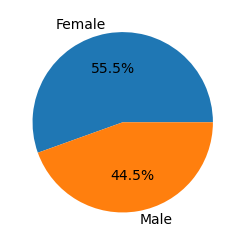

In [39]:
vCounts = data['Sex'].value_counts()
plt.subplot(1,2,1)
plt.pie(vCounts, labels=vCounts.index, autopct='%.1f%%')

Women comprise 55.5% of the participants, making the sample quite close to the real world ratio of ~51% male to ~49% female.<br>
Lets visualize the distribution of depression/anxiety likelihoods across gender:

Text(0.5, 1.0, 'Anxiety Likelihood, Female')

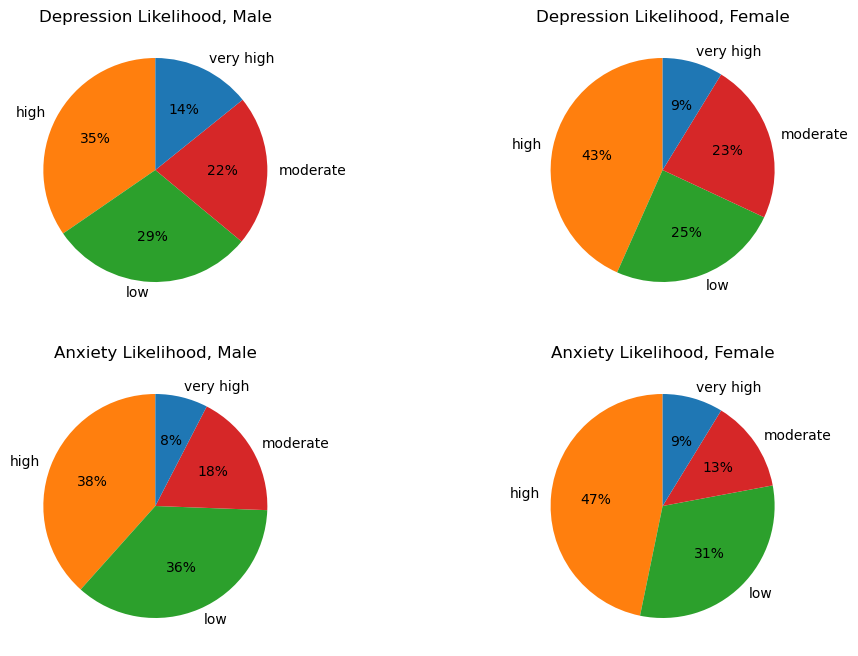

In [41]:
# create 2 different dataframes for males and females
maleDf = data.loc[data['Sex'] == 'Male']
femaleDf = data.loc[data['Sex'] == 'Female']

# get depression and anxiety value counts for men and women
maleDepValCounts = maleDf['Depression Likelihood'].value_counts()
maleAnxValCounts = maleDf['Anxiety Likelihood'].value_counts()
femaleDepValCounts = femaleDf['Depression Likelihood'].value_counts()
femaleAnxValCounts = femaleDf['Anxiety Likelihood'].value_counts()

# create pie charts
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# male depression
axs[0, 0].pie(maleDepValCounts.values, labels=maleDepValCounts.index.sort_values(), autopct = lambda p:'{:.0f}%'.format(p), startangle=90, colors=[indicatorColors[key] for key in labels])
axs[0, 0].set_title("Depression Likelihood, Male")

# male anxiety
axs[1, 0].pie(maleAnxValCounts.values, labels=maleAnxValCounts.index.sort_values(), autopct = lambda p:'{:.0f}%'.format(p), startangle=90, colors=[indicatorColors[key] for key in labels])
axs[1, 0].set_title("Anxiety Likelihood, Male")

# female depression
axs[0, 1].pie(femaleDepValCounts.values, labels=femaleDepValCounts.index.sort_values(), autopct = lambda p:'{:.0f}%'.format(p), startangle=90, colors=[indicatorColors[key] for key in labels])
axs[0, 1].set_title("Depression Likelihood, Female")

# female anxiety
axs[1, 1].pie(femaleAnxValCounts.values, labels=femaleAnxValCounts.index.sort_values(), autopct = lambda p:'{:.0f}%'.format(p), startangle=90, colors=[indicatorColors[key] for key in labels])
axs[1, 1].set_title("Anxiety Likelihood, Female")

Men appear to have a slightly higher prevalence of 'very high' depression, while women have an overwhelmingly larger percentage of 'high' anxiety.
Beyond this, the distribution between genders seems to be quite similar, and within a 5% margin.

The next parameter we will examine is relationship status:

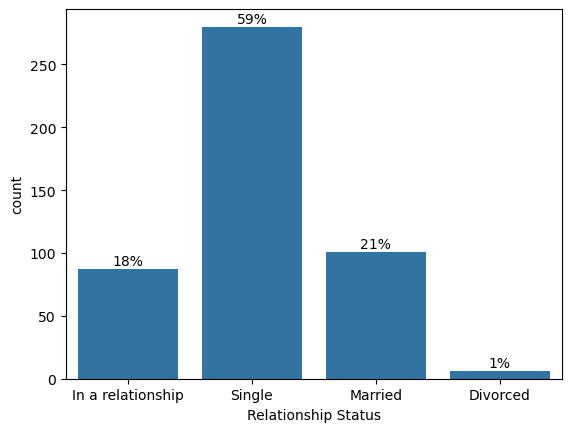

In [43]:
total=float(len(data))
ax = sns.countplot(x="Relationship Status", data=data) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 3,'{0:.0%}'.format(height/total),ha="center")

Single participants are over-represented and make up an overwhelming percentage of the sample, while divorced participants are under-represented.<br>
A similar balance problem exists with the occupation parameter, where university students are the overwhelming majority of the sample:

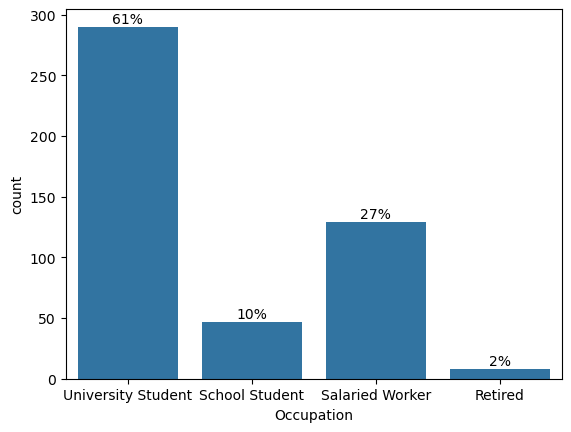

In [45]:
total=float(len(data))
ax = sns.countplot(x="Occupation", data=data) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 3,'{0:.0%}'.format(height/total),ha="center")

Both of these parameters have a category which is under-represented to a large degree, and therefor it will be impossible to make statistically significant inferences based on the "retired" and "divorced" groups. 

# EDA Summary
After a thorough examination of our data, we can come to several main conclusions:
1. As we saw in the general distribution of anxiety and depression likelihoods, the dataset is unbalanced.
2. We can expand the dataset with a new 'Number of Platforms Used' parameter based on the existing 'Platforms Used' parameter
3. Time spent on social media seems to correlate directly with higher levels of anxiety and depression indicators
4. several parameters contain categories which are under-represented to the degree that making inferences based on those categories is impossible

First, lets address point 2:

### Adding a new parameter
We can use the 'platforms used' parameter to expand our dataset and provide more data for our machine learning models. The parameter we will add is 'number of platforms used':

In [49]:
# create a column with our new parameter
data['Number of Platforms Used'] = (data['Platforms Used'].str.contains("Facebook").astype('int64') + 
                                   data['Platforms Used'].str.contains("Instagram").astype('int64') + 
                                   data['Platforms Used'].str.contains("TikTok").astype('int64') +
                                   data['Platforms Used'].str.contains("Discord").astype('int64') +
                                   data['Platforms Used'].str.contains("Twitter").astype('int64') +
                                   data['Platforms Used'].str.contains("Snapchat").astype('int64') +
                                   data['Platforms Used'].str.contains("Reddit").astype('int64') +
                                   data['Platforms Used'].str.contains("Pinterest").astype('int64') +
                                   data['Platforms Used'].str.contains("YouTube").astype('int64'))

# Lets see what our data looks like now
data.head(4)

,Age,Sex,Relationship Status,Occupation,Affiliations,Platforms Used,Time Spent,Distracted by SM,Restlessness,Easily Distracted,...,Difficulty Concentrating,SM Comparison,Depressed,Loss of Interest in Activities,Sleep Issues,Depression Score,Anxiety Score,Depression Likelihood,Anxiety Likelihood,Number of Platforms Used
0,21.0,Male,In a relationship,University Student,University,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,3,2,5,...,5,2,5,4,5,34,24,very high,high,6
1,21.0,Female,Single,University Student,University,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,3,2,4,...,4,5,5,4,5,35,28,very high,high,6
2,21.0,Female,Single,University Student,University,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,2,1,2,...,4,3,4,2,5,26,24,high,high,4
3,21.0,Female,Single,University Student,University,"Facebook, Instagram",More than 5 hours,2,1,3,...,3,5,4,3,2,26,21,high,moderate,2


There are now two things we need to do before balancing our data:

### Numerical Encoding
The algorithms which we will be using for our models can only work with numerical data. <br>
Therefor, we will encode every variable which isnt numerical using label encoding and save the labels so that we can decode the data later:

In [52]:
from sklearn.preprocessing import LabelEncoder

encLabels = {}
dataEncoded = data.copy()

for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataEncoded[column] = le.fit_transform(data[column])
    encLabels[column] = le

### Creating a Test Set
Before we balance our data and proceed to creating machine learning models, we should create a test set of unmodified data which will allow us to assess the results of the models.
We will do this by splitting the dataset into two sets, with the test set containing 20% of the data and the other 80% belonging to the training set we will use on our models:

In [54]:
from sklearn.model_selection import train_test_split

features = dataEncoded.drop(columns=['Depression Likelihood', 'Anxiety Likelihood', 'Depression Score', 'Anxiety Score'], axis = 1)
target = dataEncoded[['Depression Likelihood', 'Anxiety Likelihood', 'Depression Score', 'Anxiety Score']]

xTrain, xTest, yTrain, yTest = train_test_split(features, target, test_size=0.2, random_state=randState)

print("Our training set contains ", len(xTrain), " Entries")
print("Our test set contains ", len(xTest), " Entries")

Our training set contains  379  Entries
Our test set contains  95  Entries


### Balancing the data

Now that our data has been cleaned up, encoded and split into a training set and a test set, we can start balancing it to increase the predictive accuracy of our models. <br><br>
For this we will utilize Synthetic Minority Oversampling Technique (SMOTE), which selects a data entry from a minority class and creates synthetic examples based on an interpolation between the real data entry and its k-nearest-neighbours. <br><br>
Since we have two targets for our machine learning models, we will create two different training sets, one for depression likelihood and the other for anxiety likelihood:

In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=randState)
xResampledD, yResampledD = smote.fit_resample(xTrain, yTrain['Depression Likelihood'])
xResampledA, yResampledA = smote.fit_resample(xTrain, yTrain['Anxiety Likelihood'])

<Axes: xlabel='Depression Likelihood', ylabel='Count'>

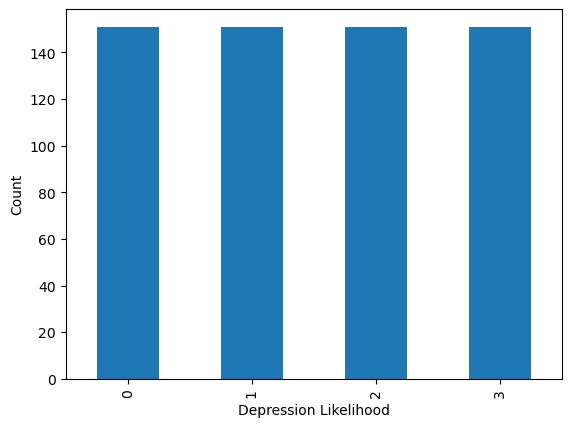

In [58]:
# visualize depression likelihood distribution accross our new depression training set
xResampledD.join(yResampledD).groupby('Depression Likelihood').size().plot.bar(xlabel='Depression Likelihood', ylabel='Count')

<Axes: xlabel='Anxiety Likelihood', ylabel='Count'>

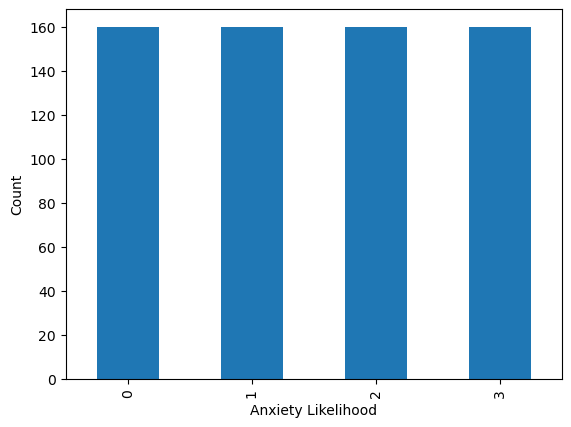

In [59]:
# visualize anxiety likelihood distribution accross our new anxiety training set
xResampledA.join(yResampledA).groupby('Anxiety Likelihood').size().plot.bar(xlabel='Anxiety Likelihood', ylabel='Count')

Now that we have two different training sets, each balanced according to one of our targets, we can proceed to building our ML models.

# Feature Selection

Because not all of our features share the same significance when it comes to predicting anxiety/depression, we must carefully select the most significant and relevant input features in order to build maximally accurate predictive models.<br>
In many instances, irrelevant input features can introduce noise into the model's learning process, resulting in predictive inaccuracies.<br><br>
To help us in selecting the appropriate features, we will use the 'Select k Best' technique.

### Select k Best
This algorithm finds a set of features which maximally correlate to a target variable according to the highest k-score.<br>
The k-score is determined by a function, and the function we will be using is the chi-squared test for independence, which examines the extent to which two variables are independent. In our case, we will use it to determine how dependent our target variables (depression/anxiety likelihood) are on the various different features:

In [105]:
from sklearn.feature_selection import SelectKBest, chi2

kBestSelector = SelectKBest(score_func=chi2, k = 8)

# depression selection
selectedFeaturesDep = kBestSelector.fit_transform(xResampledD, yResampledD)
selectedIndicesDep = kBestSelector.get_support(indices=True)

#anxiety selection
selectedFeaturesAnx = kBestSelector.fit_transform(xResampledA, yResampledA)
selectedIndicesAnx = kBestSelector.get_support(indices=True)

print(selectedIndicesDep)
print(selectedIndicesAnx)

#TODO visualize these, write a couple words about the selected features -> hypothesis for algorithm selection -> build 3 models.

[ 0  5  7  9 11 12 13 14]
[ 0  5  7  8  9 10 11 13]
